# Dimentionality Reduction

For this section, we will use UMAP for dimentionality reduction to try to visualize this dataset.

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from umap import UMAP
from sklearn.preprocessing import normalize

In [2]:
flattened_image_dir = "processed_galaxy_data/flattened_normalized_images.csv"

# load labels and flattened images
flattened_data = pd.read_csv(flattened_image_dir, header=None)
labels = pd.read_csv("processed_galaxy_data/labels_mappings_filtered.csv")

In [3]:
flattened_data.shape

(239573, 2500)

In [4]:
labels.shape

(239573, 3)

In [34]:
umap = UMAP(n_neighbors=25, min_dist=0.05)

In [35]:
embedding = umap.fit_transform(flattened_data)

In [36]:
colors = {"E":0, "S":1, "SB":2, "A":3}
labels_array = labels['shape_label'].to_numpy()
l = [sns.color_palette()[colors[x]] for x in labels_array]

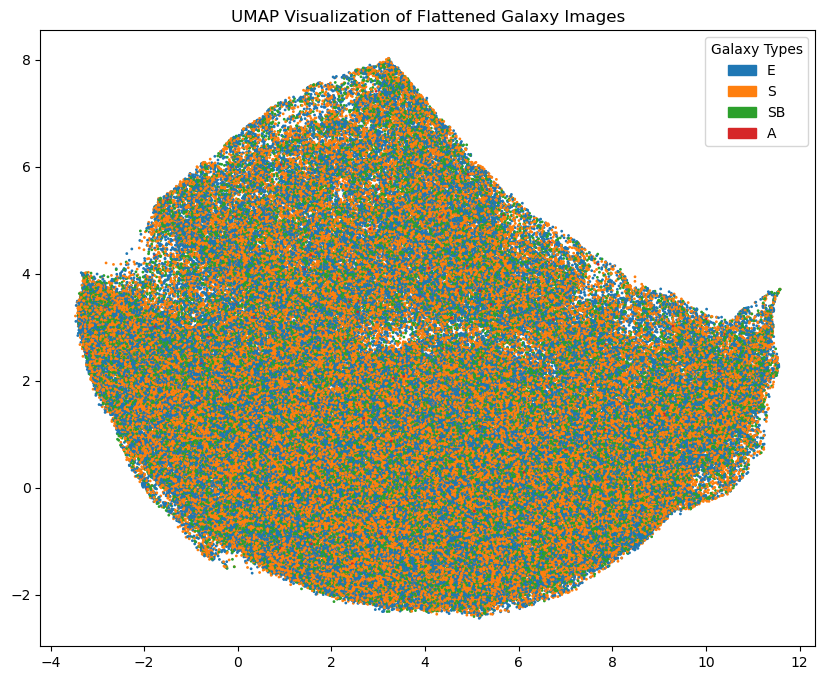

In [37]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=l, s=1)
plt.title('UMAP Visualization of Flattened Galaxy Images')

patches = [mpatches.Patch(color=sns.color_palette()[colors[t]], label=t) for t in colors]
legend = plt.legend(handles=patches, loc='upper right', title='Galaxy Types')

plt.show()

# Reconstruction

In [3]:
def view_column(col_vec, title=None):
    plt.imshow(col_vec.reshape([50, 50], order='F'), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(title)
    plt.show()

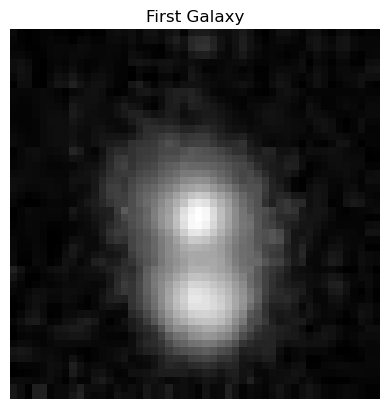

In [4]:
view_column(flattened_data.iloc[0].to_numpy(), 'First Galaxy')

In [5]:
mean_galaxy = np.mean(flattened_data, axis=0)

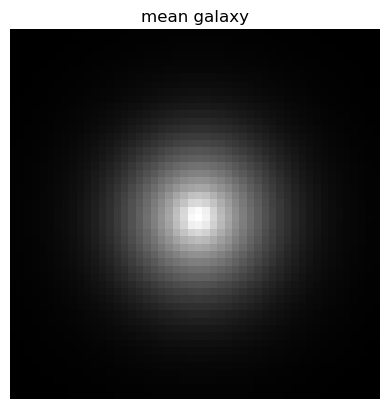

In [6]:
view_column(mean_galaxy.to_numpy(), title="mean galaxy")

In [7]:
# calculate eigenvalues and eigenvectors for all the galaxies
A = flattened_data - mean_galaxy
eig_vals, eig_vecs = np.linalg.eigh(np.matmul(A.transpose(), A))
s = np.argsort(eig_vals)

eig_vals = eig_vals[s]
eig_vecs = eig_vecs[:,s]

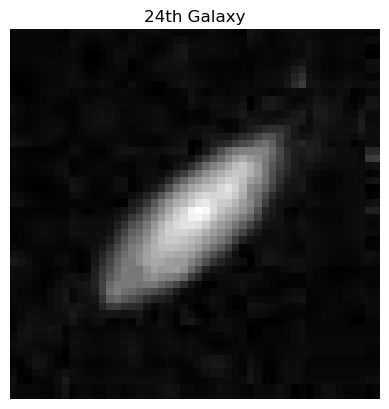

In [8]:
view_column(flattened_data.iloc[23].to_numpy(), title="24th Galaxy")

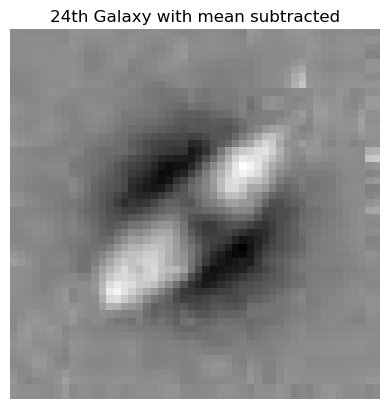

In [9]:
view_column(A.iloc[23].to_numpy(), title="24th Galaxy with mean subtracted")

In [14]:
U = np.matmul(A, eig_vecs)
U = normalize(U, norm='l2', axis=0)

In [15]:
c = np.dot(U, flattened_data.iloc[23])

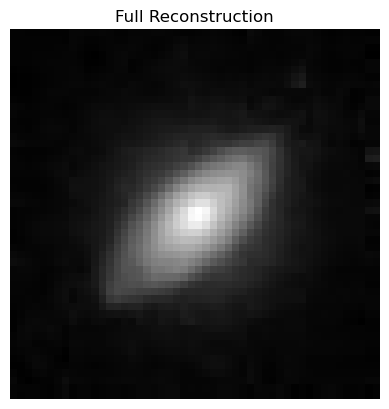

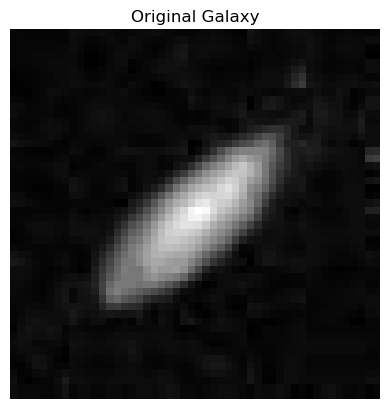

In [16]:
# Reconstruct the 24th galaxy
reconst_full = np.dot(U.T, c) + mean_galaxy

view_column(reconst_full.to_numpy(), "Full Reconstruction")
view_column(flattened_data.iloc[23].to_numpy(), "Original Galaxy")

In [18]:
# reconstruction error
np.mean(np.square(reconst_full.to_numpy() - flattened_data.iloc[23].to_numpy()))

0.020674916265370463

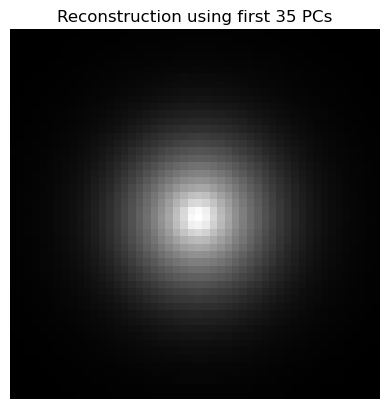

In [21]:
# time to try this but with 35 PC as we found from PCA
reconst_35 = np.dot(U[:35].T, c[:35]) + mean_galaxy

view_column(reconst_35.to_numpy(), "Reconstruction using first 35 PCs")

In [22]:
np.mean(np.square(reconst_35.to_numpy() - flattened_data.iloc[23].to_numpy()))

0.005180409818126897

The reconstruction using only the first 35 principal components looks a lot like the mean.

## Plotting the reconstructed data

In [115]:
# get 2500 random samples from the dataset
rand_ind = random_numbers = random.sample(range(flattened_data.shape[0]), 2500)

In [116]:
random_data = flattened_data.iloc[rand_ind]
random_data_labels = labels.iloc[rand_ind]

In [117]:
# reconstruct sample of 2500 using all the galaxies
reconst_data = random_data.apply(lambda x: np.dot(U.T, np.dot(U, x)) + mean_galaxy, axis=1)

In [118]:
umap = UMAP()
embedding = umap.fit_transform(reconst_data)

In [120]:
colors = {"E":0, "S":1, "SB":2, "A":3}
l = random_data_labels['shape_label'].to_numpy()
l = [sns.color_palette()[colors[x]] for x in l]

C:\Users\kianc\AppData\Local\Temp\ipykernel_1304\1100030349.py:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(['E', 'S', 'SB', 'A'], sns.color_palette())


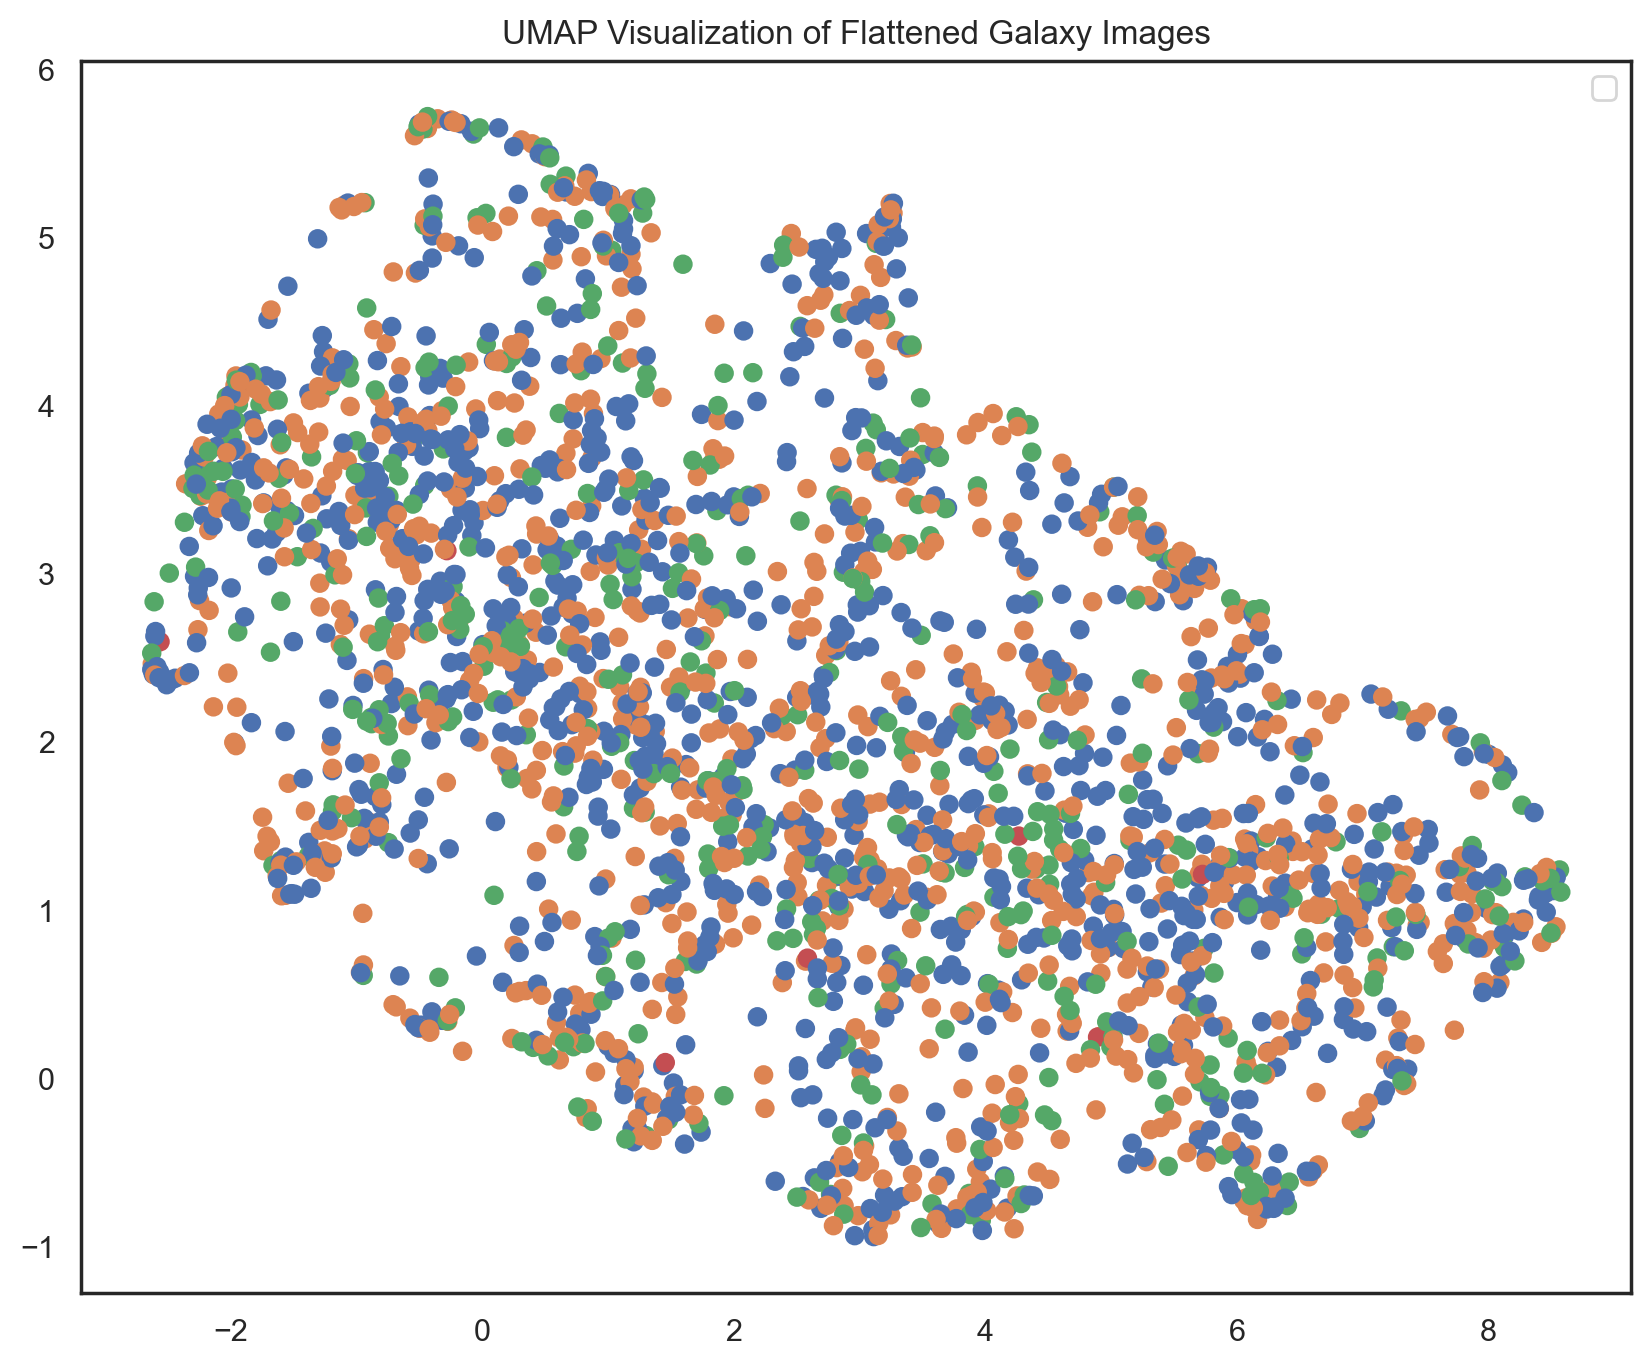

In [121]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=l)
plt.title('UMAP Visualization of Flattened Galaxy Images')
plt.legend(['E', 'S', 'SB', 'A'], sns.color_palette())
plt.show()